# Домашнее задание 2. Нейронные сети

### Хрулева Елена ИУ8-83
### Вариант 19

## Наборы данных

### Задача регрессии

D. Набор данных Таблица insurance.csv. Задача: построить модель, предсказывающую стоимость медицинской страховки (колонка charges). Baseline: RMSE (root mean square error) = 5800

### Задача классификации

N. Набор данных Таблица diabetes.csv. Задача: детектировать, есть ли у человека диабет. Baseline: sklearn.metrics.f1_score(average='macro') = 0.73

## 0. Инициализация ноутбука

Загрузка необходимых библиотек

In [1]:
import pandas as pd
import torch
import math
import matplotlib.pyplot as plt

from torch import nn
from torch.nn import functional as F
from sklearn.model_selection import train_test_split

## 1. Искусственная неронная сеть для решения задачи регрессии (9 баллов)
### 1.1 Загрузите данные, поделить на train и test
### 1.2 По необходимости проведите преодбработку/нормализацию данных

In [2]:
data = pd.read_csv(r'C:\Users\alenk\Downloads\insurance.csv')

correctData = pd.get_dummies(data)
withoutTeacher = correctData.loc[:, correctData.columns != 'charges']
teacher = correctData['charges']

withoutTeacherTraining, withoutTeacherTest, teacherTraining, teacherTest = train_test_split(withoutTeacher, teacher, train_size=0.80, random_state=17)

withoutTeacherTraining.shape, withoutTeacherTest.shape, teacherTraining.shape, teacherTest.shape

((1070, 11), (268, 11), (1070,), (268,))

### 1.3 Попробуйте различное количество слоёв

Обучите 4 модели, используя различное количество линейных слоёв: 1 (=линейная регрессия), 2, 3, 4. Между двумя линейными слоями должна быть фунция активации, например, сигмоида. На последнем слое функцию активации можно не использовать.

Постройте: 1) график loss для train и test в зависимости от используемого количетсва слоёв; 2) график accuracy для train и test в зависимости от используемого количества слоёв.

In [3]:
def TrainModel(model, optim, loss_f, epochs):
    loss_history = []
    for epoch in range(epochs):
        optim.zero_grad()
        model.train()
        
        y_pred = model.forward(torch.FloatTensor(withoutTeacherTraining.values))[:,0]    
        loss = loss_f(y_pred, torch.FloatTensor(teacherTraining.values))        
        
        loss.backward()
        optim.step()

        loss_history.append(math.sqrt(loss.item()))

        plt.yscale('log')
        plt.plot(loss_history)

def TestModel(model, loss_f):
    y_pred = model.forward(torch.FloatTensor(withoutTeacherTest.values))[:,0]    
    loss = loss_f(y_pred, torch.FloatTensor(teacherTest.values))

    print("loss: ", math.sqrt(loss.item()))


def TrainTestModels(model, optim, loss_f = F.mse_loss, epochs=1000):   
    TrainModel(model, optim, loss_f, epochs)
    TestModel(model, loss_f)

#### Один линейный слой

loss:  10868.415891931998


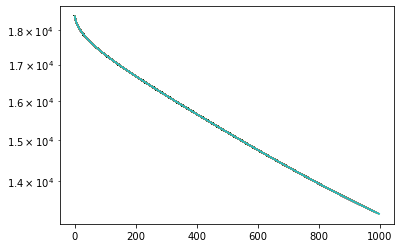

In [4]:
model = nn.Sequential() 

model.add_module('l1',nn.Linear(11,1)) 

TrainTestModels(model, torch.optim.RMSprop(model.parameters(), lr=0.1))

#### Два линейных слоя

loss:  5554.090744667394


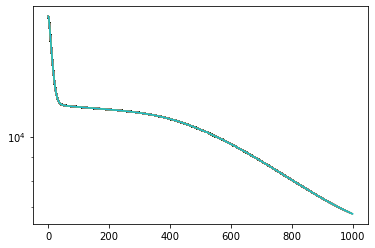

In [5]:
model = nn.Sequential() 

model.add_module('l1', nn.Linear(11, 11)) 
model.add_module('a1', nn.ReLU()) 
model.add_module('l2', nn.Linear(11, 1)) 

TrainTestModels(model, torch.optim.RMSprop(model.parameters(), lr=0.1))

#### Три линейных слоя

loss:  5374.6934796321175


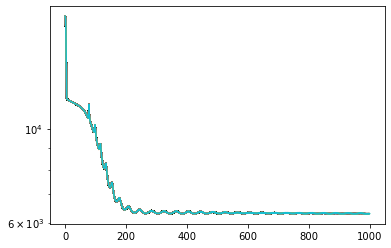

In [6]:
model = nn.Sequential() 

model.add_module('l1', nn.Linear(11,11)) 
model.add_module('a1', nn.ReLU())
model.add_module('l2', nn.Linear(11,5)) 
model.add_module('a2', nn.ReLU())
model.add_module('l3', nn.Linear(5,1))

TrainTestModels(model, torch.optim.RMSprop(model.parameters(), lr=0.1))

#### Четыре линейных слоя

loss:  5344.057260172275


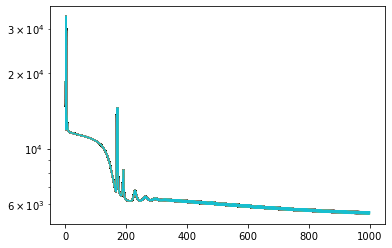

In [7]:
model = nn.Sequential() 

model.add_module('l1', nn.Linear(11,11)) 
model.add_module('a1', nn.ReLU())
model.add_module('l2', nn.Linear(11,5))
model.add_module('a2', nn.ReLU())
model.add_module('l3', nn.Linear(5,4))
model.add_module('a3', nn.ReLU())
model.add_module('l4', nn.Linear(4,1))
    
TrainTestModels(model, torch.optim.RMSprop(model.parameters(), lr=0.1))

### 1.4 Попробуйте различные функции активации
Обучите 4 модели, используя 4 различных функции активации: sigmoid, tanh, ReLU, ELU.

Постройте: 1) график loss для train и test в зависимости от используемой функции активации; 2) график accuracy для train и test в зависимости от используемой функции активации;

In [8]:
def FourLayerModel (ActivationFunc, OptimizationAlgorithm):
    model = nn.Sequential() 

    model.add_module('l1', nn.Linear(11,11)) 
    model.add_module('a1', ActivationFunc())
    model.add_module('l2', nn.Linear(11,5))
    model.add_module('a2', ActivationFunc())
    model.add_module('l3', nn.Linear(5,4))
    model.add_module('a3', ActivationFunc())
    model.add_module('l4', nn.Linear(4,1))

    TrainTestModels(model, OptimizationAlgorithm(model.parameters(), lr=0.1))


#### Функция активации ELU

loss:  4915.657433141573


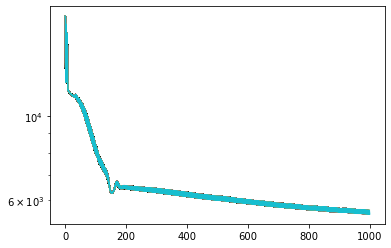

In [9]:
FourLayerModel(nn.ELU, torch.optim.RMSprop)

#### Функция активации ReLU

loss:  4667.895457269797


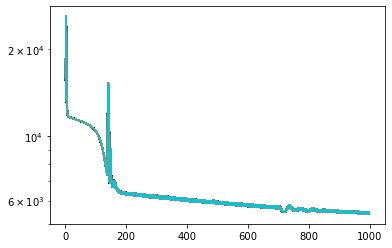

In [10]:
FourLayerModel(nn.ReLU, torch.optim.RMSprop)

#### Функция активации Sigmoid

loss:  15593.864434449852


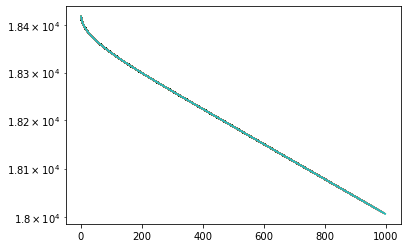

In [11]:
FourLayerModel(nn.Sigmoid, torch.optim.RMSprop)

#### Функция активации Tanh

loss:  15594.721671129626


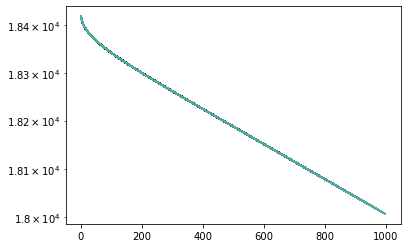

In [12]:
FourLayerModel(nn.Tanh, torch.optim.RMSprop)

### 1.5 Попробуйте различные алгоритмы оптимизации
Обучите 4 модели, используя 4 различных алгоритма оптимизации: SGD, SGD with momentum, RMSprop, Adam

Постройте: 1) график loss для train и test в зависимости от используемого алгоритма оптимизации; 2) график accuracy для train и test в зависимости от используемого алгоритма оптимизации.

####  Алгоритм оптимизациии RMSprop

loss:  4631.299169779469


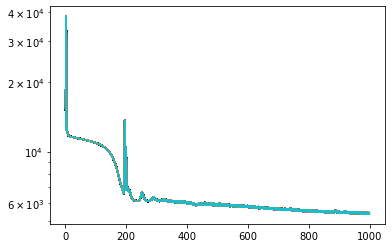

In [26]:
FourLayerModel(nn.ReLU, torch.optim.RMSprop)

####  Алгоритм оптимизациии SGD

loss:  10764.99586623237


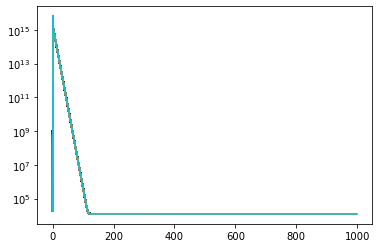

In [24]:
FourLayerModel(nn.ReLU, torch.optim.SGD)

####  Алгоритм оптимизациии Adam

loss:  4246.651151201379


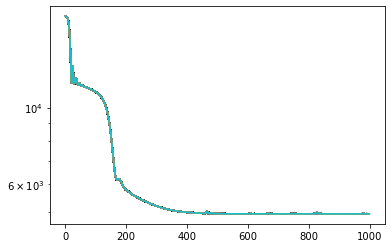

In [15]:
FourLayerModel(nn.ReLU, torch.optim.Adam)

####  Алгоритм оптимизациии SGD momentum=0.4

loss:  10764.99586623237


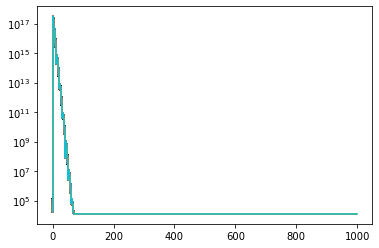

In [16]:
model = nn.Sequential() 

model.add_module('l1', nn.Linear(11,11)) 
model.add_module('a1', nn.ReLU())
model.add_module('l2', nn.Linear(11,5))
model.add_module('a2', nn.ReLU())
model.add_module('l3', nn.Linear(5,4))
model.add_module('a3', nn.ReLU())
model.add_module('l4', nn.Linear(4,1))

TrainTestModels(model, torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.4))

### 1.6 Попробуйте добавить dropout и batch norm
Обучите 5 моделей, используя 5 различных конфигураций: только BatchNorm, только dropout 0.2, только dropout 0.5, BatchNorm + dropout 0.2, BatchNorm + dropout 0.5.

Постройте: 1) график loss для train и test в зависимости от используемой конфигурации; 2) график accuracy для train и test в зависимости от используемой конфигурации.

In [17]:
def Layer (configurationB, configurationD, p = 0) :
    model = nn.Sequential() 

    model.add_module('l1', nn.Linear(11,11))    
    if configurationB:
        model.add_module('bn1', nn.BatchNorm1d(11))
    if configurationD:
        model.add_module('do1', nn.Dropout(p=p))
    model.add_module('a1', nn.ReLU())

    model.add_module('l2', nn.Linear(11,5))
    if configurationB:
        model.add_module('bn2', nn.BatchNorm1d(5))
    if configurationD:
        model.add_module('do2', nn.Dropout(p=p))
    model.add_module('a2', nn.ReLU())

    model.add_module('l3', nn.Linear(5,4))
    if configurationB:
        model.add_module('bn3', nn.BatchNorm1d(4))
    if configurationD:
        model.add_module('do3', nn.Dropout(p=p))
    model.add_module('a3', nn.ReLU())

    model.add_module('l4', nn.Linear(4,1))

    TrainTestModels(model, torch.optim.Adam(model.parameters(), lr=0.1))

#### Конфигурация BatchNorm

loss:  5107.32082407205


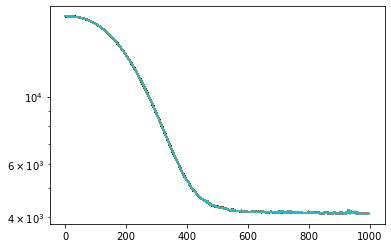

In [27]:
Layer(True, False)

#### Конфигурация dropout 0.2

loss:  7992.122871928334


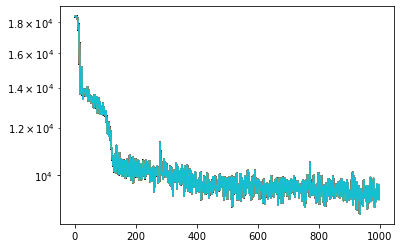

In [28]:
Layer(False, True, 0.2)

#### Конфигурация dropout 0.5

loss:  10646.62575654841


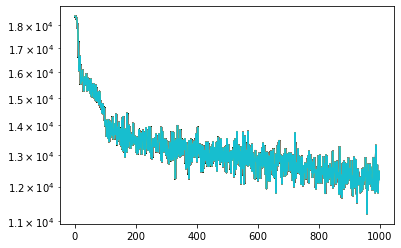

In [32]:
Layer(False, True, 0.5)

#### Конфигурация BatchNorm и dropout 0.2

loss:  7572.223715659753


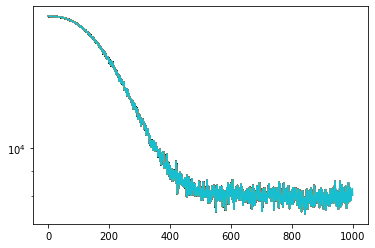

In [30]:
Layer(True, True, 0.2)

#### Конфигурация BatchNorm и dropout 0.5

loss:  9777.29083130905


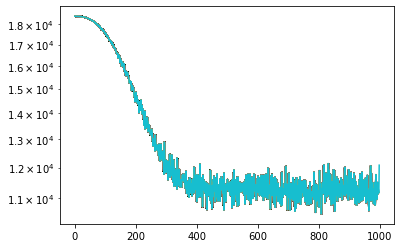

In [36]:
Layer(True, True, 0.5)

### 1.7 Постройте финальную модель
Используя информацию, полученную на предыдущих этапах, предложите оптимальную конфигурацию нейронной сети для вашей задачи. Обучите модель.

loss:  4258.846322655937


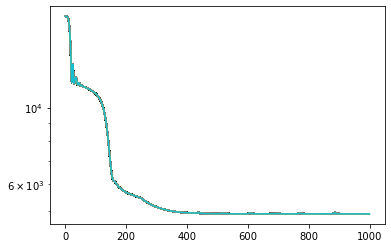

In [23]:
FourLayerModel(nn.ReLU, torch.optim.Adam)

### 1.8 Выводы
Прекрасная жизнь начинается с ваших прекрасных мыслей: 4-х слойная модель, обученная алгоритмом оптимизации Adam и функцией активации ReLU,  показала самую высокую точность при обучении: loss ~4200